<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session%207%20-%20In-Depth%20Coding%20Practice/Drill4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code Drill 4

* Target
  * Reduced the dropout to 0.1
  * In the Random Rotation fill to 0 from 1. Earlier it was 1, giving a try with 0.
* Result 
  * Parameters: 7,674
  * Best Train Accuaracy: 99.11%
  * Best Test Accuracy: 99.46%(12th Epoch)
* Analysis
  * Target Accuracy is achieved consistently. 
  * But still it is jumping between 99.4 and 99.3 from 8th epoch. This can be controlled by using suitable Learning Rate.


# Import Libraries

In [ ]:
# To reload the disk files
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                        transforms.RandomRotation((-7.0, 7.0), fill=(0,)),

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? False


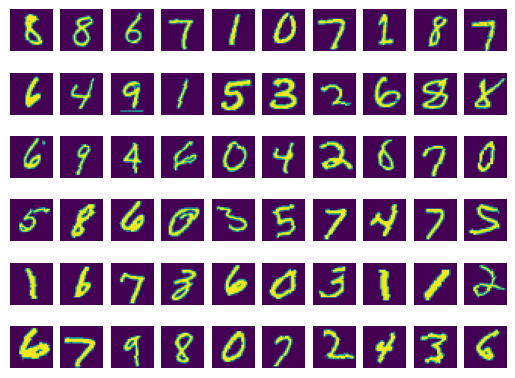

In [ ]:
from utils import plot_images
dataiter = iter(train_loader)
images, labels = next(dataiter)
plot_images(60, images)

# Model Params


In [ ]:
from models.model4 import Model4
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model4().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
         Dropout2d-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
         Dropout2d-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 22, 22]           1,080
             ReLU-10           [-1, 12, 22, 22]               0
      BatchNorm2d-11           [-1, 12, 22, 22]              24
        Dropout2d-12           [-1, 12, 22, 22]               0


# Model Training and Testing

In [ ]:
from torch.optim.lr_scheduler import StepLR
from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model4().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    train_test_instance.test(model, device, test_loader)

EPOCH: 1


Loss=0.1790345311164856 Batch_id=937 Accuracy=91.75: 100%|██████████| 938/938 [01:39<00:00,  9.44it/s]



Test set: Average loss: 0.0648, Accuracy: 9805/10000 (98.05%)

EPOCH: 2


Loss=0.049699537456035614 Batch_id=937 Accuracy=97.77: 100%|██████████| 938/938 [01:31<00:00, 10.20it/s]



Test set: Average loss: 0.0417, Accuracy: 9862/10000 (98.62%)

EPOCH: 3


Loss=0.02631046622991562 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [01:29<00:00, 10.47it/s]



Test set: Average loss: 0.0319, Accuracy: 9896/10000 (98.96%)

EPOCH: 4


Loss=0.04813039302825928 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [01:34<00:00,  9.88it/s]



Test set: Average loss: 0.0273, Accuracy: 9911/10000 (99.11%)

EPOCH: 5


Loss=0.015469368547201157 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [01:30<00:00, 10.41it/s]



Test set: Average loss: 0.0246, Accuracy: 9923/10000 (99.23%)

EPOCH: 6


Loss=0.014752472750842571 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [01:30<00:00, 10.39it/s]



Test set: Average loss: 0.0241, Accuracy: 9933/10000 (99.33%)

EPOCH: 7


Loss=0.006845609284937382 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s]



Test set: Average loss: 0.0231, Accuracy: 9926/10000 (99.26%)

EPOCH: 8


Loss=0.061654508113861084 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [01:29<00:00, 10.47it/s]



Test set: Average loss: 0.0201, Accuracy: 9943/10000 (99.43%)

EPOCH: 9


Loss=0.10443813353776932 Batch_id=937 Accuracy=99.01: 100%|██████████| 938/938 [01:29<00:00, 10.48it/s]



Test set: Average loss: 0.0196, Accuracy: 9938/10000 (99.38%)

EPOCH: 10


Loss=0.0439177080988884 Batch_id=937 Accuracy=99.06: 100%|██████████| 938/938 [01:29<00:00, 10.46it/s]



Test set: Average loss: 0.0195, Accuracy: 9938/10000 (99.38%)

EPOCH: 11


Loss=0.002575631719082594 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [01:28<00:00, 10.55it/s]



Test set: Average loss: 0.0180, Accuracy: 9942/10000 (99.42%)

EPOCH: 12


Loss=0.015850402414798737 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [01:27<00:00, 10.67it/s]



Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

EPOCH: 13


Loss=0.08292067050933838 Batch_id=937 Accuracy=99.07: 100%|██████████| 938/938 [01:28<00:00, 10.63it/s]



Test set: Average loss: 0.0184, Accuracy: 9943/10000 (99.43%)

EPOCH: 14


Loss=0.00557004613801837 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [01:28<00:00, 10.61it/s]



Test set: Average loss: 0.0191, Accuracy: 9934/10000 (99.34%)

EPOCH: 15


Loss=0.01109031867235899 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [01:29<00:00, 10.48it/s]



Test set: Average loss: 0.0177, Accuracy: 9934/10000 (99.34%)



# Loss and Accuaracy

Text(0.5, 1.0, 'Test Accuracy')

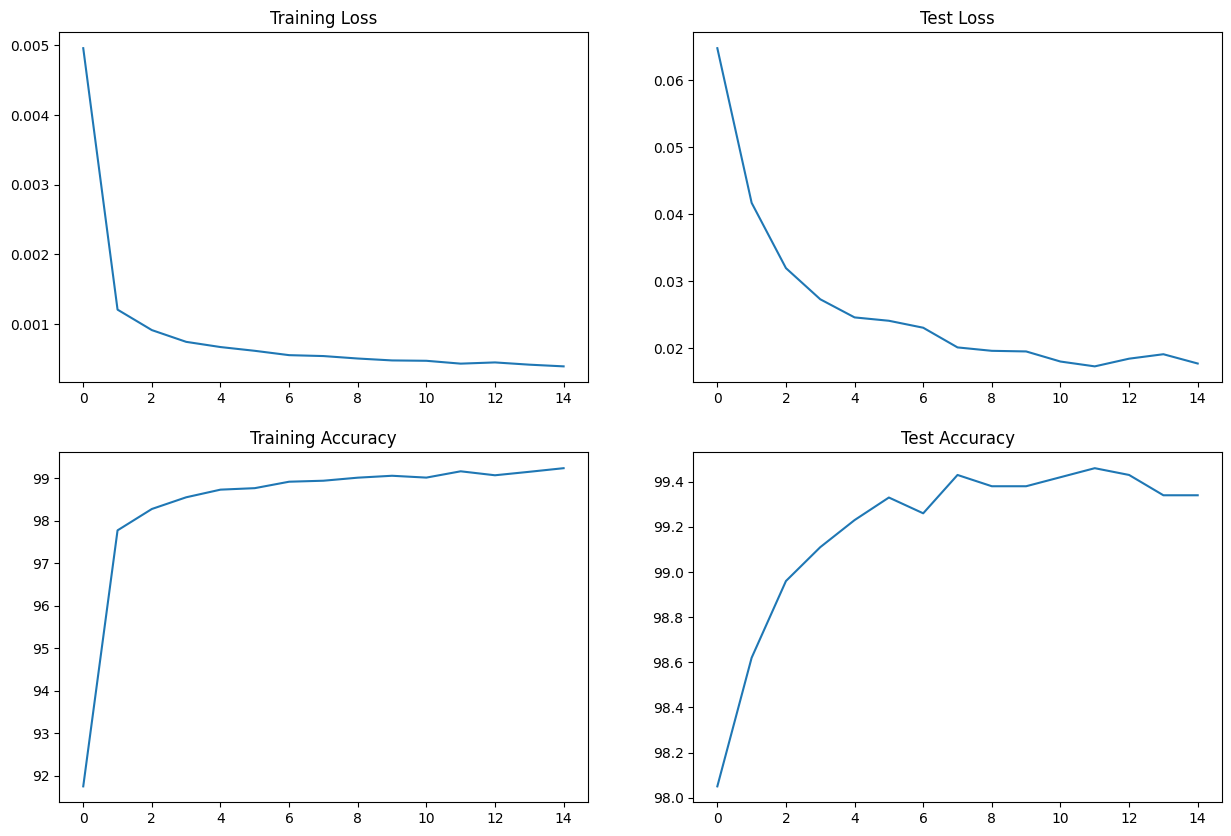

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")